## Observations and Insights 

A 2% difference is observed by studying the distribution of female vs male mice used in the study. This is not significnat and therefore it can be assumed that sex of the mice does not play a major role in the outcome of this study.

looking at the line plot of tumor volume vs. time point for mouse ID s185 treated with Capomulin, it can be seen that the tumor volume reduced significantly with time as the treatment progresses which is a promising result. 

The correlation coefficient between average mouse weight and average tumor volume for Capomulin regimen is 0.84. This indicates that there is a strong correlation between the two variables. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_set=pd.merge(mouse_metadata,study_results, how="outer", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
data_set.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(data_set["Mouse ID"].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=data_set.loc[data_set.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_set = data_set[data_set['Mouse ID'].isin(duplicates)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_set["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean=round(clean_data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean(),2)
median=round(clean_data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median(),2)
variance=round(clean_data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var(),2)
sd=round(clean_data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std(),2)
sem=round(clean_data_set.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem(),2)
summary_statistic=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":sd, "SEM":sem})
summary_statistic

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
round(clean_data_set.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}),2)


Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

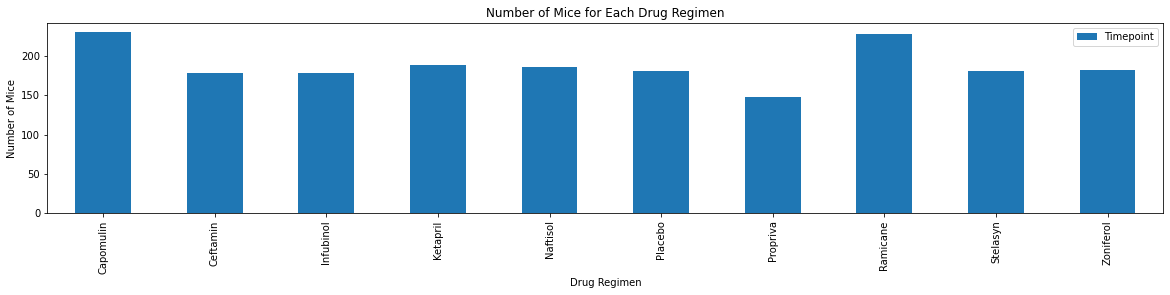

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


<Figure size 432x288 with 0 Axes>

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_tp=pd.DataFrame(clean_data_set.groupby(["Drug Regimen"]).count()["Timepoint"])

total_tp.plot(kind="bar", figsize=(20,3.5))

plt.title("Number of Mice for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

total_tp

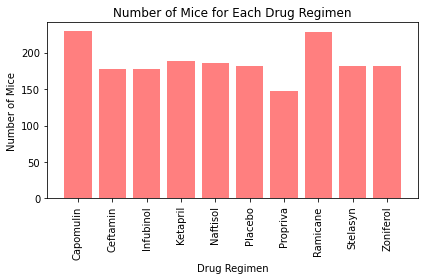

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_tp.reset_index(inplace=True)
plt.bar(total_tp["Drug Regimen"], total_tp["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Mice for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Female vs Male mice')

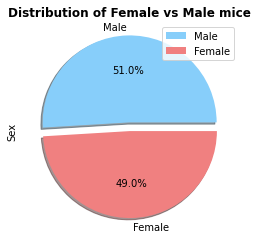

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female=pd.DataFrame(clean_data_set["Sex"].value_counts())
explode=(0.1,0)
colors = ["lightskyblue", "lightcoral"]
male_female.plot(y="Sex", kind="pie", colors=colors,explode=explode,shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Female vs Male mice",fontweight = "bold")


Text(0, 0.5, 'Sex')

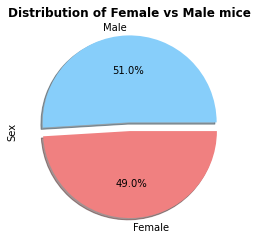

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
colors = ["lightskyblue", "lightcoral"]
explode=(0.1,0)
plt.pie(male_female["Sex"],labels=labels,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%")

plt.title("Distribution of Female vs Male mice",fontweight = "bold")
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(clean_data_set.groupby(["Mouse ID"])['Timepoint'].max())
last_timepoint.reset_index(inplace=True)
#last_timepoint.rename(columns = {'Timepoint':'Last Timepoint'}, inplace = True)
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merged=pd.merge(last_timepoint,clean_data_set, how="left", on=("Mouse ID","Timepoint"))
tumor_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

   
for drug in treatments:
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = tumor_merged.loc[tumor_merged["Drug Regimen"] == drug , 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq +(1.5*iqr)
    
    print(f"{drug}'s potential outliers:Final tumor volume below {round(lower_bound,2)} and Final tumor volume above {round(upper_bound,2)}")

    



Capomulin's potential outliers:Final tumor volume below 20.7 and Final tumor volume above 51.83
Ramicane's potential outliers:Final tumor volume below 17.91 and Final tumor volume above 54.31
Infubinol's potential outliers:Final tumor volume below 36.83 and Final tumor volume above 82.74
Ceftamin's potential outliers:Final tumor volume below 25.36 and Final tumor volume above 87.67


Text(0, 0.5, 'Final Tumor Volume (mm3)')

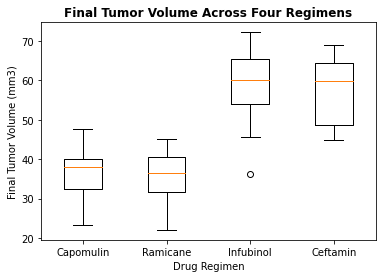

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, final_tumor=plt.subplots()
final_tumor.boxplot(tumor_vol_data, labels=treatments)

#add titles
final_tumor.set_title("Final Tumor Volume Across Four Regimens", fontweight='bold')
final_tumor.set_xlabel("Drug Regimen")
final_tumor.set_ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

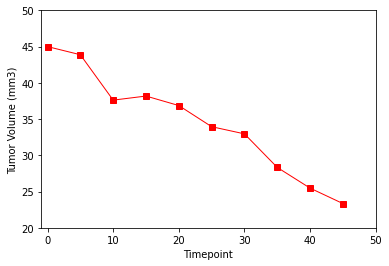

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#generate dataframe for capomulin
capomulin_df=clean_data_set.loc[clean_data_set["Drug Regimen"]=="Capomulin"]

#get data for a specific mouse
mouse = "s185"
mouse_df=capomulin_df.loc[capomulin_df["Mouse ID"]==mouse]

#generate line plot
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"],linewidth=1,marker="s",color="Red")

#set limits for x and y and titles
plt.xlim(-1, 50)
plt.ylim(20,50)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

#capomulin_df.head()


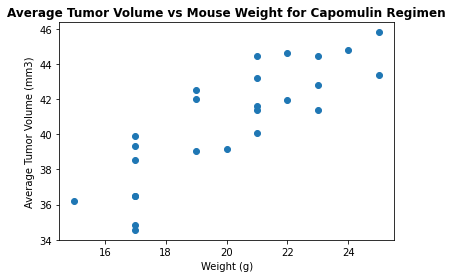

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#calculate average weight and tumor volume based on mouse id
capomulin_mean = capomulin_df.groupby("Mouse ID").mean()
mice_avg_weight= capomulin_mean["Weight (g)"]
mice_avg_vol = capomulin_mean["Tumor Volume (mm3)"]

#generate scatter plot
plt.scatter(mice_avg_weight, mice_avg_vol)

#add titles
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen", fontweight='bold')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


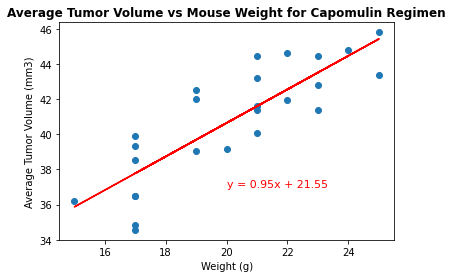

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mice_avg_weight,mice_avg_vol)[0],2)}")

plt.scatter(mice_avg_weight, mice_avg_vol)

#perform linear regression on mouse weight vs average tumor volume
slope, intercept, r, p, std_err = st.linregress(mice_avg_weight, mice_avg_vol)

#create equation of line
fit = slope * mice_avg_weight + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the linear model
plt.plot(mice_avg_weight,fit,color="red")

#add equation of line to the graph
plt.annotate(equation,(20,37), fontsize=11, color="red")

#add titles
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen", fontweight='bold')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()